In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
df = pd.read_csv("/content/tomato.csv")
df

,Data,Unit,Minimum,Maximum,Average,Unnamed: 5,Unnamed: 6
0,2013-06-16,Kg,26,32,29.0,NaN,NaN
1,2013-06-17,Kg,20,25,22.5,NaN,NaN
2,2013-06-18,Kg,22,26,24.0,NaN,NaN
3,2013-06-19,Kg,24,28,26.0,NaN,NaN
4,2013-06-20,Kg,22,26,24.0,NaN,NaN
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,NaN,NaN
2737,2021-05-10,Kg,10,15,12.5,NaN,NaN
2738,2021-05-11,Kg,10,15,12.5,NaN,NaN
2739,2021-05-12,Kg,30,35,32.5,NaN,NaN


In [ ]:
from sklearn import linear_model
import datetime as dt

In [ ]:

reg = linear_model.LinearRegression()

In [ ]:
df


,Data,Unit,Minimum,Maximum,Average,Unnamed: 5,Unnamed: 6,Data_Ordinal
0,2013-06-16,Kg,26,32,29.0,NaN,NaN,735035
1,2013-06-17,Kg,20,25,22.5,NaN,NaN,735036
2,2013-06-18,Kg,22,26,24.0,NaN,NaN,735037
3,2013-06-19,Kg,24,28,26.0,NaN,NaN,735038
4,2013-06-20,Kg,22,26,24.0,NaN,NaN,735039
...,...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,NaN,NaN,737919
2737,2021-05-10,Kg,10,15,12.5,NaN,NaN,737920
2738,2021-05-11,Kg,10,15,12.5,NaN,NaN,737921
2739,2021-05-12,Kg,30,35,32.5,NaN,NaN,737922


In [69]:
df['Year'] = df['Data'].dt.year
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day

In [70]:
reg = linear_model.LinearRegression()
reg.fit(df[['Year', 'Month', 'Day']], df['Average'])

LinearRegression()

In [71]:
def get_prediction(date_input):
    # Convert '15-04-2020' string to numbers
    d_obj = dt.datetime.strptime(date_input, '%d-%m-%Y')

    # Pass Year, Month, and Day as the features
    price = reg.predict([[d_obj.year, d_obj.month, d_obj.day]])
    return round(price[0], 2)

In [73]:
print(f"The avg price for the Tomato is {math.floor(get_prediction('15-09-2020'))}")

The avg price for the Tomato is 42


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

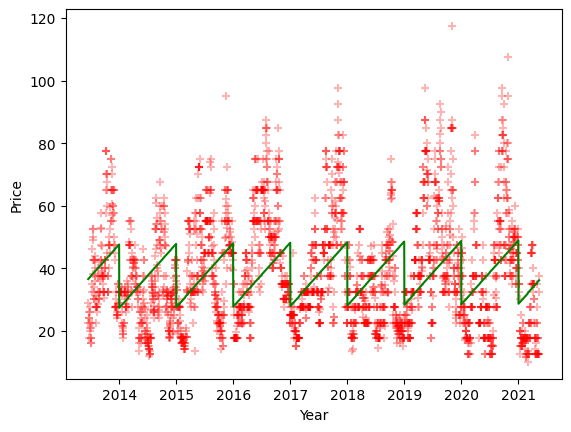

In [78]:
plt.xlabel('Year')
plt.ylabel('Price')
plt.scatter(df.Data, df["Average"], color='red', marker='+', alpha=0.3)
plt.plot(df.Data, reg.predict(df[['Year', 'Month', 'Day']]), color='green')
plt.show()

In [79]:
score = reg.score(df[['Year', 'Month', 'Day']], df['Average'])

In [80]:
print(f"The score of the model is {score}")

The score of the model is 0.12032989582545739
